In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import warnings as w
w.filterwarnings('ignore')
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

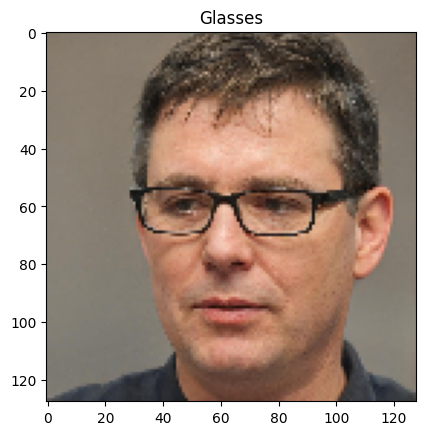

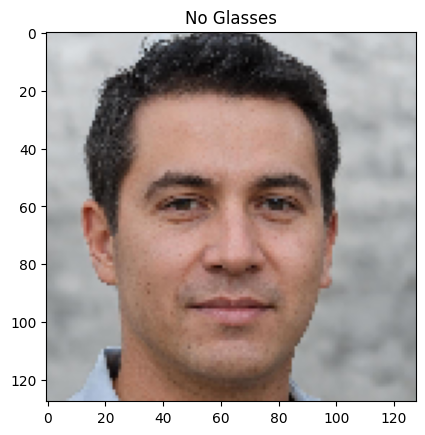

In [31]:
#there are two category of images
# glasses
img_glasses = 'face-77.jpg' #img path
img_glasses = load_img(img_glasses, target_size=(128,128)) #loading image
plt.imshow(img_glasses)
plt.title('Glasses')
plt.show()
img_no_glasses = 'face-200.jpg'
img_no_glasses = load_img(img_no_glasses, target_size=(128,128))

plt.imshow(img_no_glasses)
plt.title('No Glasses')
plt.show()

- We have to predict whether the person in image has glasses or not

In [3]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) #normalizing data and setting train test split

In [4]:
width = 128
height = 128
# train data
trainDatagen = datagen.flow_from_directory(directory='glasses/', #path to images
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16, # images per batch
                                           subset='training')

Found 148 images belonging to 2 classes.


In [5]:
# test/validation data
valDatagen = datagen.flow_from_directory(directory='glasses/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 36 images belonging to 2 classes.


- Increasing the number of images as we are not getting good accuracy with only 86 images. Now total images are 184
- This is the accuracy with 86 images
- Epoch 10/10
- 5/5 [==============================] - 1s 286ms/step - loss: 0.4875 - accuracy: 0.7101 - val_loss: 0.4443 - val_accuracy: 0.705

In [6]:
# model creation
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3))) # using conv2d because images are 2d 
model.add(MaxPool2D(2,2)) #used to reduce spatial dimensions (height&width)
model.add(Dropout(0.2)) #dropout is used to avoid overfitting 
#selection of activation is down as per need/problem

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
#hidden layer1
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
#hidden llayer 2
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1,activation='sigmoid'))
#output layer 
#using sigmoid because output is in binary form. 


# model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape = (224,224,3))
#                    ,MaxPooling2D(2,2),
                    
#                     Conv2D(64, (3,3), activation='relu'),
#                     MaxPooling2D(2,2),
                    
#                     Conv2D(128, (3,3), activation='relu'),
#                     MaxPooling2D(2,2),
                    
#                     Flatten(),
#                     Dense(128, activation='relu'),
#                     Dropout(0.5),  # Dropout to prevent overfitting
                    
#                     Dense(1,activation='sigmoid')
#                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# optimizer is used while updating weight in backpropagation to minimize the loss/errors
# loss function changes with problem to problem, error between actual and predicted

In [10]:
history = model.fit_generator(generator = trainDatagen, #for providing training data
                             steps_per_epoch = len(trainDatagen), #no. of batches per epoch i.e no of sample/batch size
                              epochs =10,
                              validation_data = valDatagen, #test data
                              validation_steps=len(valDatagen))

Epoch 1/10
10/10 [==============================] - 4s 356ms/step - loss: 1.0032 - accuracy: 0.4797 - val_loss: 0.6919 - val_accuracy: 0.5278
Epoch 2/10
10/10 [==============================] - 3s 305ms/step - loss: 0.6915 - accuracy: 0.5203 - val_loss: 0.6906 - val_accuracy: 0.5278
Epoch 3/10
10/10 [==============================] - 3s 318ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5278
Epoch 4/10
10/10 [==============================] - 3s 322ms/step - loss: 0.6911 - accuracy: 0.5270 - val_loss: 0.6854 - val_accuracy: 0.5278
Epoch 5/10
10/10 [==============================] - 3s 304ms/step - loss: 0.6820 - accuracy: 0.5000 - val_loss: 0.6581 - val_accuracy: 0.7222
Epoch 6/10
10/10 [==============================] - 3s 304ms/step - loss: 0.5995 - accuracy: 0.7500 - val_loss: 0.5205 - val_accuracy: 0.8611
Epoch 7/10
10/10 [==============================] - 3s 304ms/step - loss: 0.4406 - accuracy: 0.8311 - val_loss: 0.3449 - val_accuracy: 0.9444
Epoch 

In [11]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valDatagen, steps=len(valDatagen))

# Print the validation loss and accuracy
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


3/3 [==============================] - 0s 96ms/step - loss: 0.1344 - accuracy: 0.9167
Validation Loss: 0.1344422698020935
Validation Accuracy: 0.9166666865348816


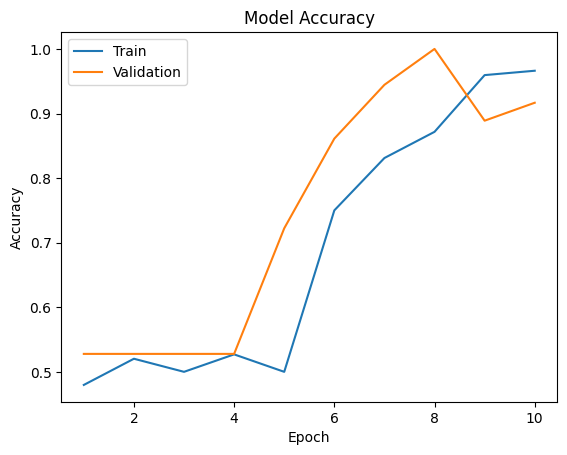

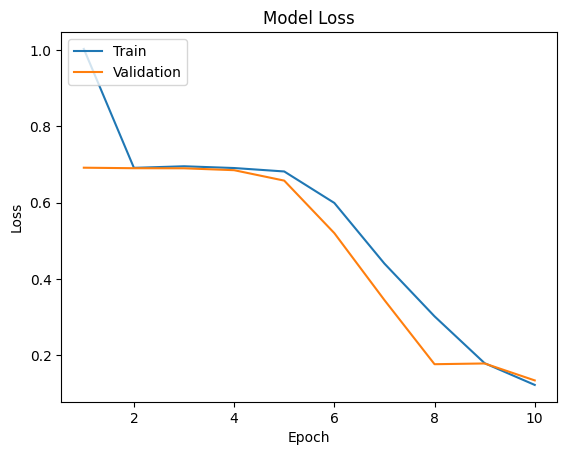

In [12]:
def plotLearningCurve(history):
    # Get the number of epochs from the history
    epochs = len(history.history['accuracy'])
    
    # Plot accuracy
    epochRange = range(1, epochs + 1)
    plt.plot(epochRange, history.history['accuracy'])
    plt.plot(epochRange, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(epochRange, history.history['loss'])
    plt.plot(epochRange, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function with the history object
plotLearningCurve(history)


### Prediction Model

1/1 [==============================] - 0s 20ms/step
Predicted Label: glasses


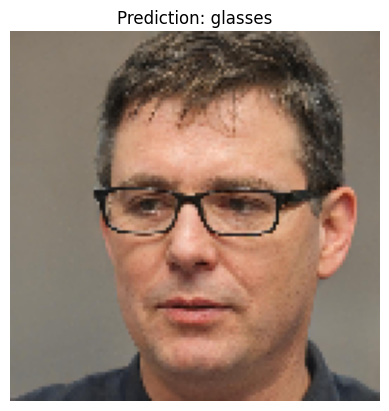

1/1 [==============================] - 0s 17ms/step
Predicted Label: no_glasses


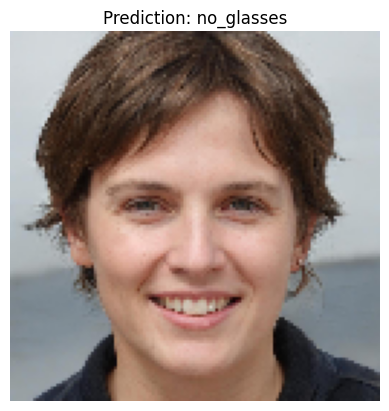

1/1 [==============================] - 0s 18ms/step
Predicted Label: no_glasses


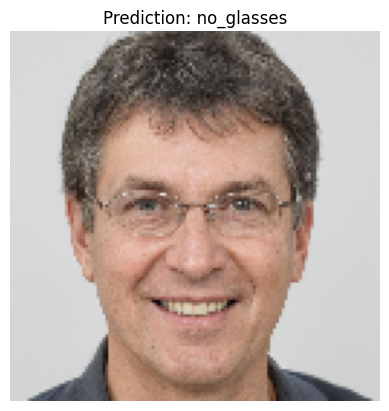

1/1 [==============================] - 0s 21ms/step
Predicted Label: glasses


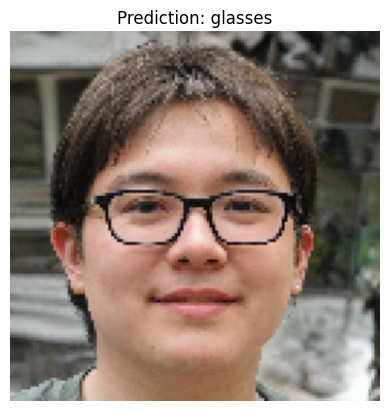

1/1 [==============================] - 0s 18ms/step
Predicted Label: glasses


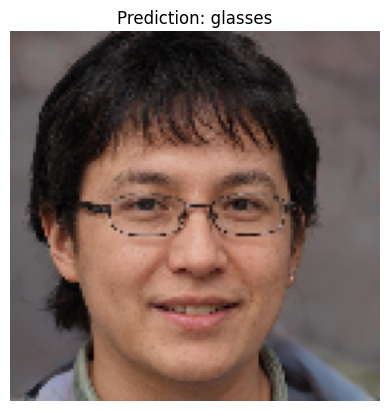

1/1 [==============================] - 0s 20ms/step
Predicted Label: glasses


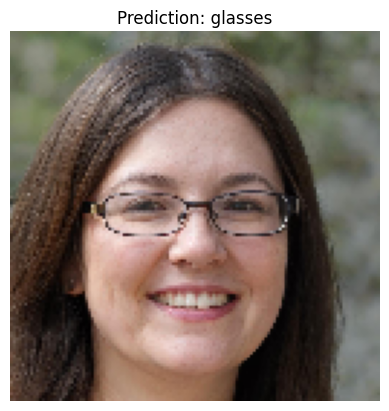

1/1 [==============================] - 0s 18ms/step
Predicted Label: no_glasses


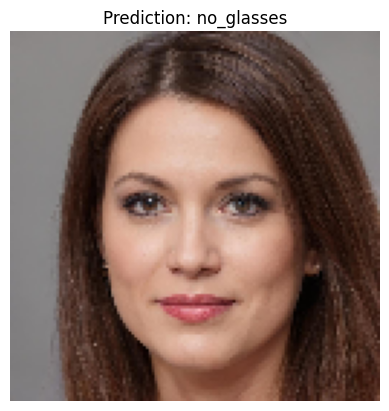

1/1 [==============================] - 0s 19ms/step
Predicted Label: no_glasses


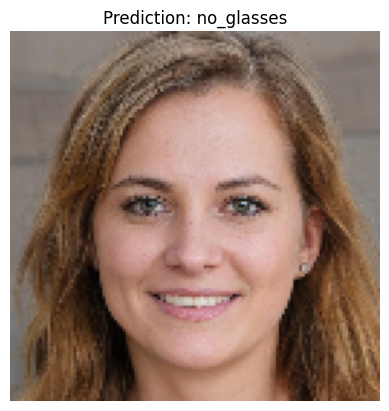

1/1 [==============================] - 0s 17ms/step
Predicted Label: no_glasses


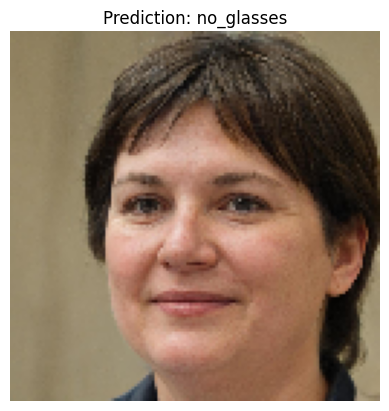

1/1 [==============================] - 0s 17ms/step
Predicted Label: no_glasses


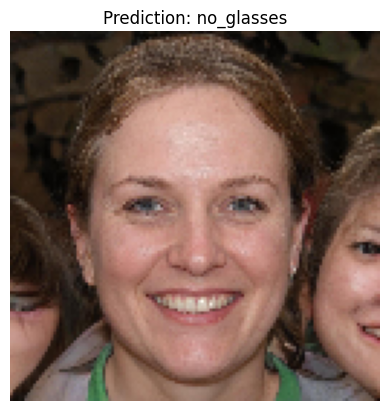

1/1 [==============================] - 0s 17ms/step
Predicted Label: no_glasses


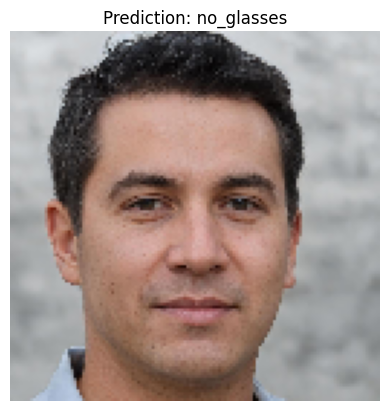

1/1 [==============================] - 0s 18ms/step
Predicted Label: no_glasses


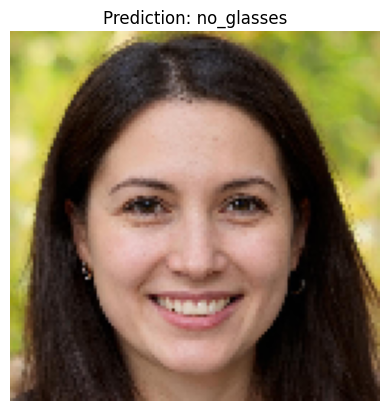

1/1 [==============================] - 0s 18ms/step
Predicted Label: no_glasses


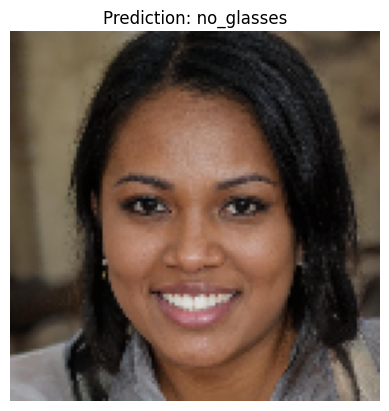

1/1 [==============================] - 0s 22ms/step
Predicted Label: no_glasses


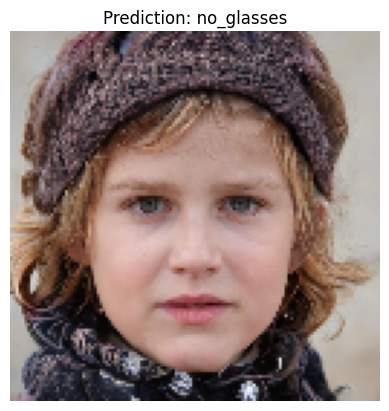

In [26]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img_list=['face-77.jpg' ,'face-30.jpg','face-343.jpg','face-344.jpg', 'face-363.jpg',
          'face-364.jpg', 'face-172.jpg', 'face-174.jpg', 'face-177.jpg','face-181.jpg','face-200.jpg' 
         ,'face-202.jpg', 'face-209.jpg', 'face-213.jpg'   ] #testing images for model
for image in img_list:
    img_path = image 
    img = load_img(img_path, target_size=(128, 128))  # Load image and resize
    img_array = img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  

    # Predict
    single_prediction = model.predict(img_array)
    class_labels = list(valDatagen.class_indices.keys()) #stores classes eg 0 for glasses 1 for no glasses
    predicted_label = class_labels[int(single_prediction[0][0] > 0.5)]  # if probability > 0.5 then no glasses as per example


    print(f"Predicted Label: {predicted_label}")
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')  # Hide axis
    plt.show()

In [27]:
# Save the model to a file
model.save('model_glasses_detection.h5')  # .h5 format
